In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

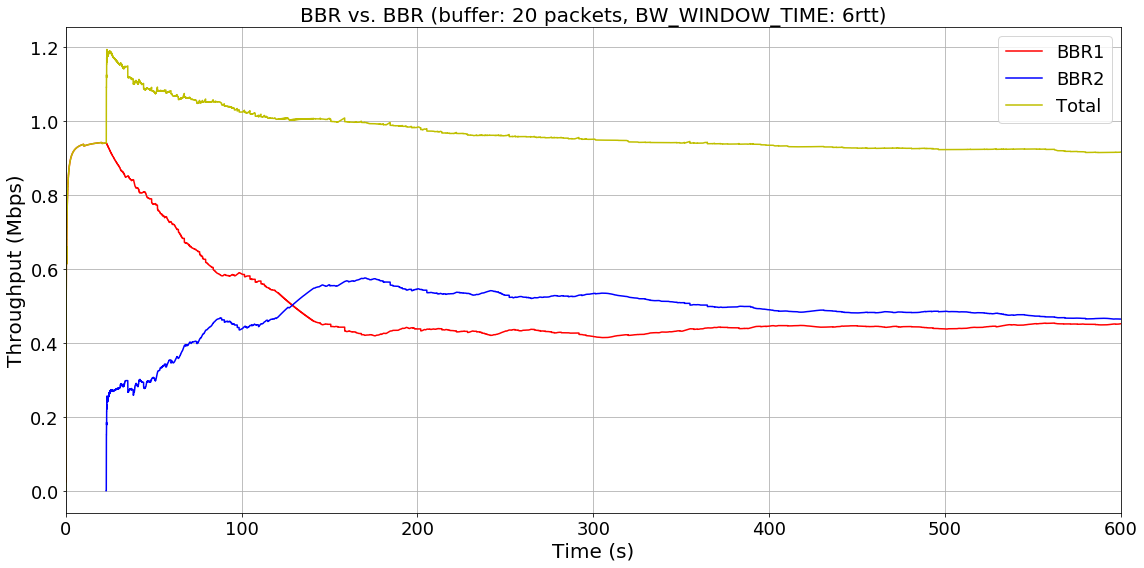

In [2]:
# Use TimeStamp as index for Y, instead of 0,1, ... 
# Convert TimeStamp into date-time format
X = pd.read_csv('throughput_1.csv', header = None)
Y = pd.read_csv('throughput_2.csv', header = None)
#timeIndex=pd.to_datetime(X[0], unit='s')
#timeIndex=pd.to_datetime(Y['TimeStamp'], unit='s')

X.index=X[0]
Y.index = Y[0]

A = pd.concat([X[1],Y[1]],axis=1).fillna(0)
A.columns = [0,1]
A[2] = A[0]+A[1]
#A.index = X[0]

# Generate a figure with one subplot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

# Produce the plots for specified features sets
x = X[1].plot(color='r')
y = Y[1].plot(color = 'b')
a = A[2].plot(color = 'y')
axes.grid(True)

# Customizing plot (changing font size, labels)
font_size = 20
plt.title('BBR vs. BBR (buffer: 20 packets, BW_WINDOW_TIME: 6rtt)', fontsize=font_size)
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('Throughput (Mbps)', fontsize=font_size)
plt.legend(('BBR1','BBR2','Total'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
#plt.xticks(np.arange(0,300,10))
plt.tight_layout()
plt.savefig("Throughput.png")
plt.show()

In [119]:
A.to_csv('totalthroughput.csv')